In [99]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.metrics import r2_score
from matplotlib.offsetbox import AnchoredText

In [12]:
dantzig_filename = "dantzigResults.txt"
spira_filename = "spiraResults.txt"
moffatAndTakaoka_filename = "moffatAndTakaokaResults.txt"

def get_results(filename):
    x = []
    y = []
    with open(filename) as file:
        for line in file:
            line = line.replace("\n", "")
            values = line.split("=")
            x.append(int(values[0]))
            y.append(float(values[1])/1000)
    return x, y

In [175]:
def plotResults(name, x, y, y_predict, notation):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, label="Experimental")
    ax.plot(x, y_predict, label="Teórico", linestyle='dashed')
    ax.set_xlabel('n', fontsize="x-large")
    ax.set_ylabel('Tiempo (s)', fontsize="x-large")
    ax.set_title('Algoritmo de ' + name, fontsize="x-large")
    ax.legend(loc='upper left', bbox_to_anchor=(0.1, 0.8), fontsize="large")
    txt = "R^2 = " + str(r2_score(y, y_predict))[:5]
    ax.add_artist(AnchoredText(txt, loc='upper left', bbox_to_anchor=(0.1, 0.6), bbox_transform=ax.transAxes))
    ax.add_artist(AnchoredText(notation, loc='upper left', bbox_to_anchor=(0.1, 0.5), bbox_transform=ax.transAxes))
    plt.show()

def dantzig(filename):
    x, y = get_results(filename)
    x = np.array(x)
    y = np.array(y)
    parameters, other = curve_fit(lambda t,a,b: a+b*np.power(t,3),  x,  y)
    y_predict = parameters[0] + parameters[1]*np.power(x, 3)
    plotResults("Dantzig", x, y, y_predict, "O(n^3)")

def spira(filename):
    x, y = get_results(filename)
    x = np.array(x)
    y = np.array(y)
    parameters, other = curve_fit(lambda t,a,b: a+b*np.power(t*np.log2(t),2),  x,  y)
    y_predict = parameters[0] + parameters[1]*np.power(x*np.log2(x),2)
    plotResults("Spira", x, y, y_predict, "O((nlogn)^2)")

def moffatAndTakaoka(filename):
    x, y = get_results(filename)
    x = np.array(x)
    y = np.array(y)
    parameters, other = curve_fit(lambda t,a,b: a+b*np.power(t,2)*np.log2(t),  x,  y)
    y_predict = parameters[0] + parameters[1]*np.power(x,2)*np.log2(x)
    plotResults("Moffat y Takaoka", x, y, y_predict, "O(n^2 logn)")
    
    

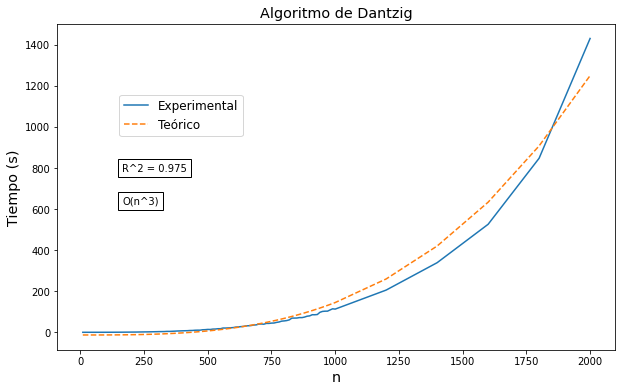

In [172]:
dantzig("dantzigResults.txt")

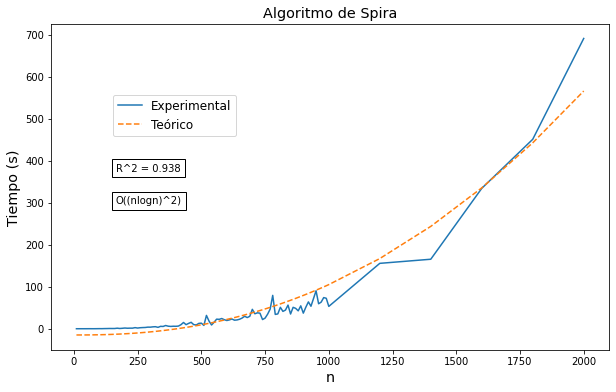

In [173]:
spira("spiraResults.txt")

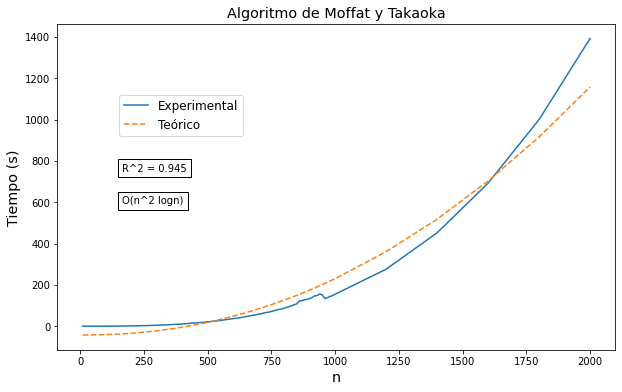

In [176]:
moffatAndTakaoka("moffatAndTakaokaResults.txt")